In [19]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import random
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint

In [11]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [27]:
folder_path = "D:/Projects/News Article classifier/01 Dataset Creation/Pickles//"

filename = "features_test.pickle"
with open(folder_path + filename, "rb") as file:
    features_test = pickle.load(file)
    
filename = "features_train.pickle"
with open(folder_path + filename, "rb") as file:
    features_train = pickle.load(file)
    
filename = "labels_test.pickle"
with open(folder_path + filename, "rb") as file:
    labels_test = pickle.load(file)

filename = "labels_train.pickle"
with open(folder_path + filename, "rb") as file:
    labels_train = pickle.load(file)
    
filename = "tfidf.pickle"
with open(folder_path + filename, "rb") as file:
    tfidf = pickle.load(file)
    
filename = "X_test.pickle"
with open(folder_path + filename, "rb") as file:
    X_test = pickle.load(file)
    
filename = "X_train.pickle"
with open(folder_path + filename, "rb") as file:
    X_train = pickle.load(file)
    
filename = "y_test.pickle"
with open(folder_path + filename, "rb") as file:
    y_test = pickle.load(file)
    
filename = "y_train.pickle"
with open(folder_path + filename, "rb") as file:
    y_train = pickle.load(file)

    filename = "data.pickle"
with open(folder_path + filename, "rb") as file:
    data = pickle.load(file)


# Random Forest Classifier

### Default Model

In [12]:
#Default Model
rf_1 = RandomForestClassifier(random_state=23)
rf_1.fit(features_train, labels_train)
ypred = rf_1.predict(features_test)
accuracy_score(ypred, labels_test)

0.9443447037701975

In [14]:
print(rf_1.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=23, verbose=0,
                       warm_start=False)>


In [15]:
print("Training Accuracy: {}".format(accuracy_score(rf_1.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(ypred, labels_test)))


Training Accuracy: 1.0
Test Accuracy: 0.9443447037701975


### Randomized Search CV

#### First Run

In [14]:
n_estimators = list(range(100, 1501, 100)) #15 options
max_depth = [None] + list(range(5, 16, 5)) #4 options
min_samples_split = [2] + list(range(5, 21, 5)) #5 options
bootstrap = [True, False] #2 options
min_samples_leaf = [1, 5, 10, 15] # 4 options 
param_grid = {"n_estimators" : n_estimators,
            "max_depth" : max_depth,
            "min_samples_split" : min_samples_split,
            "bootstrap" : bootstrap,
            "min_samples_leaf" : min_samples_leaf}

In [17]:
random_rf = RandomForestClassifier(random_state=23)
rf_cv1 = RandomizedSearchCV(estimator= random_rf, 
                           param_distributions= param_grid,
                           n_iter = 240,
                           scoring = "accuracy",
                           cv = 3,
                           verbose = 1,
                           random_state = 48,
                           n_jobs = -1)
rf_cv1.fit(features_train, labels_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 11.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [21]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(rf_cv1.best_score_, rf_cv1.best_params_))

Best Score: 0.9580550999057128
Bests Params: {'n_estimators': 1100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}



In [32]:
best_model = rf_cv1.best_estimator_
best_model.fit(features_train, labels_train)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Training Accuracy: 1.0
Test Accuracy: 0.9443447037701975


**Observation**: After the 1st run, we observe that the model is overfit. We will try altering the tree specific features like max_features to reduce over-fitting.

#### Second Run

In [36]:
# Lesser number of n_estimators and including max_features and increasing cv to 5

n_estimators = [1000, 1050, 1100, 1150, 1200] #5 options
max_features = [10, 13, 16] #3 options
max_depth = [None, 5, 15] #3 options
min_samples_split = [7, 10, 13] #5 options
bootstrap = [True, False] #2 options
min_samples_leaf = [1, 5, 10] # 3 options 
param_grid = {"n_estimators" : n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "bootstrap" : bootstrap,
              "min_samples_leaf" : min_samples_leaf}

random_rf = RandomForestClassifier(random_state=23)
rf_cv1 = RandomizedSearchCV(estimator= random_rf, 
                           param_distributions= param_grid,
                           n_iter = 200,
                           scoring = "accuracy",
                           cv = 5,
                           verbose = 1,
                           random_state = 48,
                           n_jobs = -1)
rf_cv1.fit(features_train, labels_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 20.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [37]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(rf_cv1.best_score_, rf_cv1.best_params_))

Best Score: 0.962859865853878
Bests Params: {'n_estimators': 1200, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': None, 'bootstrap': False}



In [38]:
best_model = rf_cv1.best_estimator_
best_model.fit(features_train, labels_train)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Training Accuracy: 1.0
Test Accuracy: 0.9551166965888689


Better Performance, but still overfit!

We will continue optimizing and narrowing the parameter sets. For neatness of this notebook, I have not included the multiple runs I did for thorough analysis.

After Randomized Search CV, when the parameter set is  very small, I perform Grid Search CV to do exhaustive search.

### Grid Search CV

In [33]:
n_estimators = [1200] #3 options
max_features = [7] #1 options
max_depth = [None] #1 options
min_samples_split = [5] #1 options
bootstrap = [False] #1 options
min_samples_leaf = [1, 2, 3] # 1 options 
param_grid = {"n_estimators" : n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "min_samples_split" : min_samples_split,
              "bootstrap" : bootstrap,
              "min_samples_leaf" : min_samples_leaf}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 48)

grid_rf = RandomForestClassifier(random_state=23)

rf_cv2 = GridSearchCV(estimator=grid_rf,
                       param_grid = param_grid, 
                       scoring = "accuracy",
                       n_jobs = -1,
                       cv = 5,
                       verbose = 1)
rf_cv2.fit(features_train, labels_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   14.9s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   20.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=23,
                                  

In [34]:
print(
"""Best Score: {0}
Bests Params: {1}
""".format(rf_cv2.best_score_, rf_cv2.best_params_))

best_model = rf_cv2.best_estimator_
best_model.fit(features_train, labels_train)
ypred = best_model.predict(features_test)
print("Training Accuracy: {}".format(accuracy_score(best_model.predict(features_train), labels_train)))
print("Test Accuracy: {}".format(accuracy_score(best_model.predict(features_test), labels_test)))

Best Score: 0.9670514826203449
Bests Params: {'bootstrap': False, 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1200}

Training Accuracy: 1.0
Test Accuracy: 0.9605026929982047


In [24]:
pprint(best_model.get_params())

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 7,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}


#### Classification Report

In [25]:
print(classification_report(labels_test, ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       116
           1       0.94      0.95      0.95       107
           2       0.96      0.94      0.95        99
           3       0.96      0.99      0.98       138
           4       0.99      0.92      0.95        97

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



#### Confusion Matrix

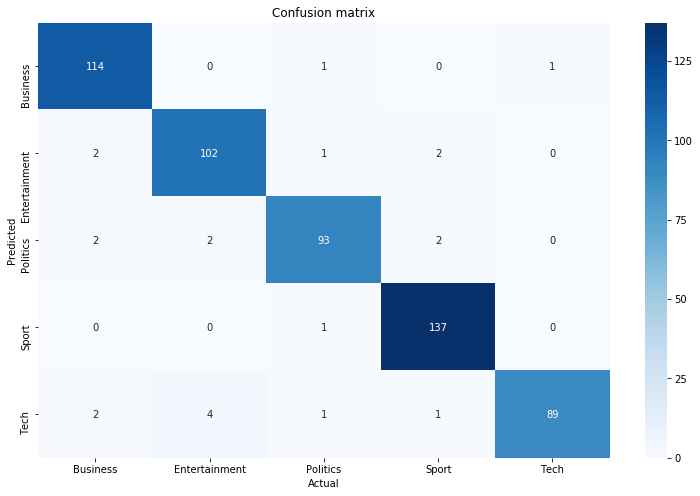

In [28]:
aux_df = data[['Category', 'Category_codes']].drop_duplicates().sort_values('Category_codes')
conf_matrix = confusion_matrix(labels_test, ypred)

plt.figure(figsize=(12.8,8))
ax = sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt = "g")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


We will create a dataframe with Model Name, Training Accuracy and Test Accuracy to compare later

In [41]:
models_summary = pd.DataFrame({"Model Name:" : ["Random Forest Classifier"],
     "Training Accuracy" : [accuracy_score(labels_train, best_model.predict(features_train))],
     "Test Accuracy" : [accuracy_score(labels_test, ypred)]}, index = [0])

In [45]:
models_summary

,Model Name:,Training Accuracy,Test Accuracy
0,Random Forest Classifier,1.0,0.960503


In [31]:
with open("Models//best_rfc.pickle", "wb") as output:
    pickle.dump(best_model, output)

In [46]:
with open("Models//models_summary.pickle", "wb") as output:
    pickle.dump(models_summary, output)